<a href="https://colab.research.google.com/github/FathimaHidaMPMeethal/Fathima_Hida/blob/main/UDS%2CCDS%2CExp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import symbols, Function, dsolve
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def gauss_seidel(aP,aE,aW,b,phi0, tol):
    err=1
    phi=phi0
    while(err>tol):
      err=0
      for i in range(0,len(phi0)):
          if i==0:
              tmp = (aE[i]*phi[i+1]+b[i])/aP [i]
          elif i==len(phi0)-1:
              tmp = (aW[i]*phi[i-1]+b[i])/aP[i]
          else:
              tmp = (aE[i]*phi[i+1]+aW[i]*phi[i-1]+b[i])/aP[i]
          err += (tmp-phi[i])**2
          phi[i] = tmp
    return phi

In [6]:
gauss_seidel([2,3],[1,0],[0,2],[1,2],[0,0],1e-03)

[1.240740740740741, 1.4938271604938274]

# **Analytic**

In [10]:
x = symbols('x')
al,a2 = -10,2   #a1-diffusion, a2-source
phi = Function('phi') (x)
phix = phi.diff(x)
phixx = phix.diff(x)
eq = phixx+al*phix+a2
eq


-10*Derivative(phi(x), x) + Derivative(phi(x), (x, 2)) + 2

In [8]:
sol=dsolve(eq,phi,ics={phi.subs(x,0):0,phi.subs(x,1):1})
sol

Eq(phi(x), x/5 + 4*exp(10*x)/(-5 + 5*exp(10)) - 4/(-5 + 5*exp(10)))

In [9]:
N=20
dx=1/N
x_range=np.arange(0,N,1)*dx+0.5*dx
rhs=sol.rhs
aphi=np.zeros(N)
for i in range(N):
  aphi[i]=rhs.subs(x,x_range[i])

# **CDS**

In [12]:
caP = 2*np. ones (N)
caE = (1+al*dx*0.5)*np. ones (N)
caW = (1-al*dx*0.5)*np. ones (N)
cb = a2*dx*dx*np.ones(N)
caW[0],caE[N-1]= 0,0
caP [0], caP[N-1] = 3-0.5*al*dx, 3-0.5*al*dx

cb[N-1] += al*dx+2

cphi = gauss_seidel(caP, caE,caW,cb,np.zeros(N),1e-06)

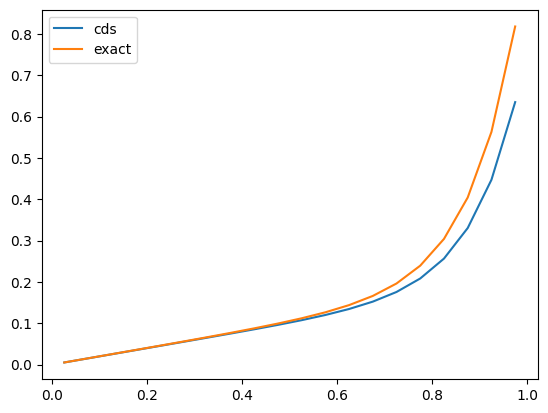

In [14]:
plt.plot(x_range,cphi,x_range,aphi)
plt.legend(['cds','exact'])

# **UDS**

In [15]:
uaP = (2-al*dx)*np. ones (N)
uaE = np.ones(N)
uaW = (1-al*dx)*np.ones(N)
ub = a2*dx*dx*np.ones (N)

uaW[0],uaE[N-1] = 0,0

uaP[0],uaP[N-1] = 3-al*dx,3

ub[N-1] += al*dx+2

uphi = gauss_seidel(uaP,uaE,uaW, ub, np. zeros (N), 1e-10)


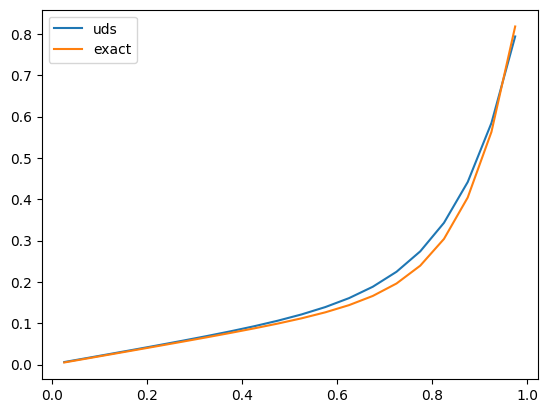

In [21]:
plt.plot(x_range,uphi,x_range,aphi)
plt.legend(['uds','exact'])

# **Exp**

In [26]:
haP=(1+2/(np.exp(-al*dx)-1))*np.ones(N)
haE=np.ones(N)/(np.exp(-al*dx)-1)
haW = np.exp(-al*dx)*np.ones(N)/(np.exp(-al*dx)-1)
hb = -a2*dx*np.ones (N) /al
haW [0] ,haE[N-1] = 0,0
haP[0] = 1+1/(np.exp(-al*dx)-1)+1/(np.exp(-al*dx*0.5)-1)
haP[N-1] = 1/(np.exp(-al*dx)-1)+1/(np. exp(-al*dx*0.5)-1)
hb[N-1] += (2-np.exp(-al*dx*0.5))/(np. exp(-al*dx*0.5)-1)
hphi = gauss_seidel(haP, haE, haW, hb, np. zeros (N) , 1e-10)



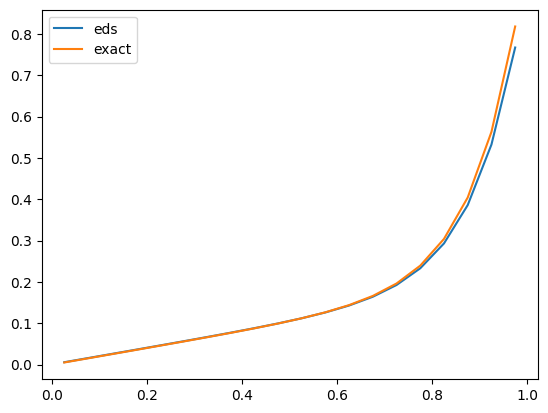

In [27]:
plt.plot(x_range,hphi,x_range,aphi)
plt.legend(['eds','exact'])